In [ ]:
import pandas as pd
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if needed
nltk.download('stopwords', quiet=True)

def simple_word_freq_analysis():
    """Simple word frequency analysis for Fox News transcripts"""

    # Load data
    df = pd.read_csv('Fox_News_Data.csv')
    print(f"Loaded {len(df)} documents")

    # Use the first text column found
    text_col = df.columns[0]  # Assuming first column is text
    if 'text' in df.columns or 'transcript' in df.columns:
        text_col = 'transcript' if 'transcript' in df.columns else 'text'
    print(f"Analyzing column: '{text_col}'")

    # Get stopwords
    stop_words = set(stopwords.words('english'))

    # Add common words to filter
    stop_words.update(['like', 'would', 'could', 'should', 'get', 'got', 'go', 'going',
                      'also', 'one', 'two', 'three', 'first', 'second', 'third',
                      'us', 'may', 'might', 'must', 'need', 'see', 'said', 'say',
                      'fox', 'news', 'nbsp', 'uh', 'um', 'ah'])

    # Process text
    all_words = []
    for text in df[text_col].astype(str):
        # Clean and lowercase
        text_clean = re.sub(r'[^a-z\s]', ' ', text.lower())

        # Tokenize and filter
        words = [w for w in text_clean.split()
                if w not in stop_words and len(w) >= 3]
        all_words.extend(words)

    # Count frequencies
    word_counts = Counter(all_words)

    # Display top words
    print(f"\n{'='*60}")
    print("TOP 50 WORDS IN FOX NEWS TRANSCRIPTS")
    print(f"{'='*60}")

    total_words = len(all_words)
    for rank, (word, count) in enumerate(word_counts.most_common(50), 1):
        percentage = (count / total_words) * 100
        print(f"{rank:2}. {word:20} {count:6} ({percentage:.1f}%)")

    # Show statistics
    print(f"\nSTATISTICS:")
    print(f"Total words: {total_words:,}")
    print(f"Unique words: {len(word_counts):,}")

    # Save results
    pd.DataFrame(word_counts.most_common(),
                columns=['word', 'frequency']).to_csv('word_freq.csv', index=False)

    print(f"\nResults saved to: word_freq.csv")
    return word_counts

# Run the analysis
word_counts = simple_word_freq_analysis()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Loaded 61 documents
Analyzing column: 'transcript'

TOP 50 WORDS IN FOX NEWS TRANSCRIPTS
 1. ice                     559 (1.6%)
 2. people                  426 (1.2%)
 3. law                     342 (1.0%)
 4. know                    338 (0.9%)
 5. minneapolis             282 (0.8%)
 6. enforcement             276 (0.8%)
 7. federal                 264 (0.7%)
 8. right                   227 (0.6%)
 9. agents                  224 (0.6%)
10. want                    186 (0.5%)
11. minnesota               186 (0.5%)
12. think                   178 (0.5%)
13. officers                175 (0.5%)
14. president               173 (0.5%)
15. good                    164 (0.5%)
16. trump                   132 (0.4%)
17. officer                 131 (0.4%)
18. city                    130 (0.4%)
19. mayor                   126 (0.4%)
20. state                   119 (0.3%)
21. look                    118 (0.3%)
22. protesters              118 (0.3%)
23. let                     116 (0.3%)
24. country   

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

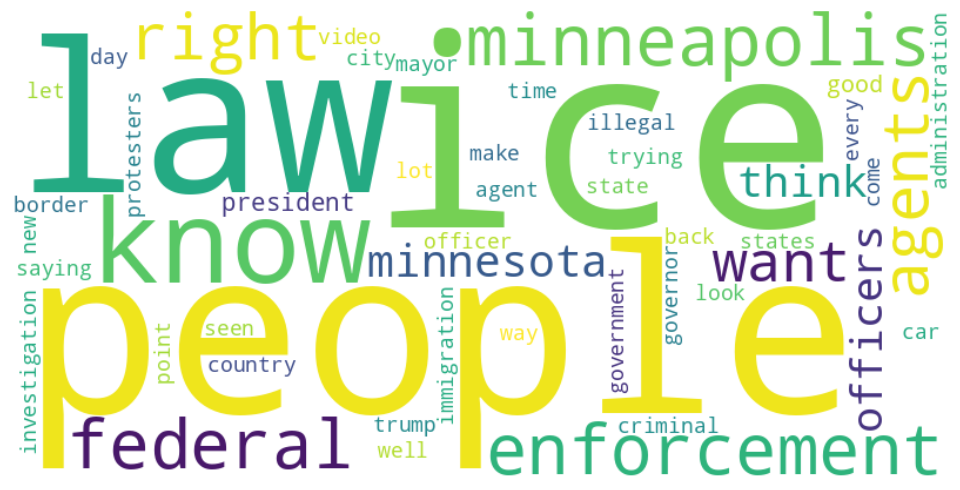

Word cloud saved as: wordcloud_simple.png


In [ ]:
# Add this at the end of your existing function:

def create_simple_wordcloud(word_counts):
    """Create a simple word cloud from top 50 words"""
    try:
        from wordcloud import WordCloud
        import matplotlib.pyplot as plt

        # Get top 50 words
        top_50 = dict(word_counts.most_common(50))

        # Generate word cloud
        wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_50)

        # Display
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig('wordcloud_simple.png', dpi=150)
        plt.show()

        print("Word cloud saved as: wordcloud_simple.png")

    except ImportError:
        print("Install: pip install wordcloud matplotlib")

# Call it after your analysis
create_simple_wordcloud(word_counts)

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models
import re

# 加载数据
df = pd.read_csv('Fox_News_Data.csv')
text_col = 'transcript'  # 改成你的列名

# 1. 预处理文档
processed_docs = []
for text in df[text_col].astype(str):
    # 清理文本
    text_clean = re.sub(r'[^a-z\s]', ' ', text.lower())
    # 分词
    words = text_clean.split()

    processed_docs.append(words)

print(f"Processed {len(processed_docs)} documents")

# 2. 创建词典
dictionary = corpora.Dictionary(processed_docs)


print(f"Vocabulary size: {len(dictionary)}")

# 3. 创建语料库（词袋表示）
corpus = [dictionary.doc2bow(text) for text in processed_docs]

# 4. 训练LDA模型
num_topics = 5
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=15,          # 迭代次数
    random_state=42,
    alpha='auto',       # 自动学习主题分布
    eta='auto'          # 自动学习词分布
)

# 5. 显示主题
print(f"\n{'='*70}")
print("LDA TOPIC MODELING RESULTS")
print(f"{'='*70}")

for idx, topic in lda_model.print_topics(-1, num_words=10):
    print(f"\nTopic {idx}:")
    # 解析主题字符串，格式如：'0.025*"ice" + 0.018*"federal" + ...'
    topic_parts = topic.split('+')
    for part in topic_parts[:8]:  # 显示前8个词
        part = part.strip()
        if '*' in part:
            weight, word = part.split('*')
            weight = float(weight.strip())
            word = word.strip().replace('"', '')
            print(f"  {word:15} : {weight:.3f}")

# 6. 可视化（需要pyLDAvis）
try:
    print(f"\n{'='*70}")
    print("CREATING INTERACTIVE VISUALIZATION")
    print(f"{'='*70}")

    vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

    # 保存为HTML文件
    pyLDAvis.save_html(vis, 'lda_visualization.html')
    print("✓ Interactive visualization saved: lda_visualization.html")

    # 在Jupyter中显示
    pyLDAvis.display(vis)

except ImportError:
    print("To create interactive visualization, install: pip install pyLDAvis")
except Exception as e:
    print(f"Visualization error: {e}")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Processed 61 documents
Vocabulary size: 4982


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


LDA TOPIC MODELING RESULTS

Topic 0:
  the             : 0.001
  to              : 0.001
  and             : 0.001
  gt              : 0.001
  you             : 0.000
  that            : 0.000
  in              : 0.000
  a               : 0.000

Topic 1:
  the             : 0.045
  to              : 0.030
  and             : 0.030
  gt              : 0.024
  that            : 0.022
  of              : 0.020
  in              : 0.015
  is              : 0.015

Topic 2:
  the             : 0.034
  and             : 0.025
  gt              : 0.023
  to              : 0.021
  in              : 0.019
  a               : 0.014
  of              : 0.012
  is              : 0.012

Topic 3:
  the             : 0.036
  to              : 0.028
  and             : 0.028
  of              : 0.022
  that            : 0.020
  gt              : 0.020
  a               : 0.018
  is              : 0.016

Topic 4:
  the             : 0.037
  nbsp            : 0.028
  and             : 0.027
  to        

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

✓ Interactive visualization saved: lda_visualization.html


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
